In [16]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv(r"C:\Users\Mayuk jain\Downloads\Agriculture-Monitoring(Final)\Data-processed\crop_recommendation.csv")

In [18]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,71,46,35,20.879744,82.002744,6.502985,202.935536,rice
1,62,42,39,21.770462,80.319644,7.038096,226.655537,rice
2,70,58,44,23.004459,82.320763,7.840207,263.964248,rice
3,92,59,42,26.491096,80.158363,6.980401,242.864034,rice
4,89,38,40,20.130175,81.604873,7.628473,262.717340,rice


In [19]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,102,28,27,26.774637,66.413269,6.780064,177.774507,coffee
2196,98,29,31,27.417112,56.636362,6.086922,127.924610,coffee
2197,81,40,25,24.131797,67.225123,6.362608,173.322839,coffee
2198,96,16,35,26.272418,52.127394,6.758793,127.175293,coffee
2199,118,16,25,23.603016,60.396475,6.779833,140.937041,coffee


In [20]:
df.size

17600

In [21]:
df.shape

(2200, 8)

In [22]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [23]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [24]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [25]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<Axes: >

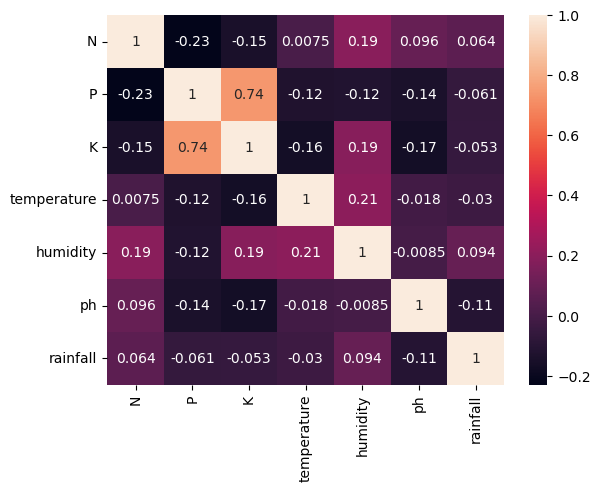

In [26]:
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [27]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [28]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [29]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=15)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x1 = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x1)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x1*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  98.4090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      0.94      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.93      0.91        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      0.96      0.98        23
       maize       0.95      1.00      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.95      1.00      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [33]:
score

array([0.98636364, 0.97727273, 0.99318182, 0.98636364, 0.98409091])

### Saving trained Decision Tree model

In [34]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = r"C:\Users\Mayuk jain\Downloads\Agriculture-Monitoring(Final)\App\models\DecisionTree.pkl"
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

# Define base Gaussian Naive Bayes model
gnb = GaussianNB()

# Define bagging classifier with 50 base estimators and max_samples of 0.5
bagging = BaggingClassifier(base_estimator=gnb, n_estimators=50, max_samples=0.5, random_state=2)

# Fit bagging classifier to training data
bagging.fit(Xtrain, Ytrain)

# Predict on test data and evaluate model
predicted_values = bagging.predict(Xtest)
x2 = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x2)
model.append('Bagged Naive Bayes')
print("Bagged Naive Bayes's Accuracy is: ", x2 * 100)
print(classification_report(Ytest, predicted_values))

Bagged Naive Bayes's Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      

In [36]:
# Cross validation score (NaiveBayes)
score = cross_val_score(gnb,features,target,cv=5)
score

array([0.99545455, 0.99772727, 0.99090909, 0.99318182, 0.98863636])

### Saving trained Guassian Naive Bayes model

In [37]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = r"C:\Users\Mayuk jain\Downloads\Agriculture-Monitoring(Final)\App\models\NBClassifier.pkl"
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(gnb, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [38]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Define the SVM model
SVM = SVC(kernel='poly', degree=3, C=1)

# Define the BaggingClassifier object
bagging = BaggingClassifier(base_estimator=SVM, n_estimators=10, max_samples=0.6, max_features=0.6)

# Define the parameter grid to search over
param_grid = {
    'base_estimator__C': [0.1, 1, 10],
    'base_estimator__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'n_estimators': [5, 10, 20],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

# Define the GridSearchCV object
grid_search = GridSearchCV(bagging, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the normalized training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
grid_search.fit(X_train_norm, Ytrain)

# Predict the test data using the best estimator found by GridSearchCV
X_test_norm = norm.transform(Xtest)
predicted_values = grid_search.best_estimator_.predict(X_test_norm)

# Evaluate the model's accuracy
x3 = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x3)
model.append('Bagging SVM with GridSearchCV')
print("Bagging SVM's Accuracy with GridSearchCV is: ", x3 *100)
print(classification_report(Ytest, predicted_values))


Bagging SVM's Accuracy with GridSearchCV is:  98.86363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      0.96      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange     

In [39]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.98181818, 0.98636364, 0.99090909, 0.98863636, 0.97272727])

In [40]:
#Saving trained SVM model

In [41]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = r"C:\Users\Mayuk jain\Downloads\Agriculture-Monitoring(Final)\App\models\SVMClassifier.pkl"
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
LogReg = LogisticRegression(random_state=2)

# Define the hyperparameters to be tuned
hyperparameters = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}

# Create the GridSearchCV object
clf = GridSearchCV(LogReg, hyperparameters, cv=5)

# Fit the GridSearchCV object to the data
clf.fit(Xtrain, Ytrain)

# Get the best parameters and score
best_params = clf.best_params_
best_score = clf.best_score_

# Create a new logistic regression model using the best parameters
LogReg_tuned = LogisticRegression(random_state=2, penalty=best_params['penalty'], C=best_params['C'])

# Fit the tuned model to the training data
LogReg_tuned.fit(Xtrain, Ytrain)

# Use the tuned model to predict on the test data
predicted_values = LogReg_tuned.predict(Xtest)

# Compute the accuracy of the tuned model
x4 = metrics.accuracy_score(Ytest, predicted_values)

# Append the accuracy and model name to the lists
acc.append(x4)
model.append('Tuned Logistic Regression')

# Print the results
print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Tuned Logistic Regression's Accuracy is:", x4)
print(classification_report(Ytest, predicted_values))


Best Parameters: {'C': 100, 'penalty': 'l2'}
Best Score: 0.9613636363636363
Tuned Logistic Regression's Accuracy is: 0.9477272727272728
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.88      0.94      0.91        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.92      1.00      0.96        22
      cotton       0.83      0.95      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.78      0.75      0.76        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       0.89      0.81      0.85        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.84      0.91        19
    mungbean       0.96      1.00      0.98        24

In [43]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.96136364, 0.95227273, 0.95909091, 0.96818182, 0.93863636])

### Saving trained Logistic Regression model

In [44]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = '../models/LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn import metrics
from sklearn.metrics import classification_report

# Create the parameter grid
param_dist = {'n_estimators': randint(1, 1800),
              'max_depth': randint(1, 75),
              'min_samples_split': randint(2, 65),
              'min_samples_leaf': randint(2, 65)}

# Create the Random Forest classifier
RF = RandomForestClassifier(random_state=5)

# Create the RandomizedSearchCV object
clf = RandomizedSearchCV(RF, param_distributions=param_dist, cv=5)

# Fit the RandomizedSearchCV object to the data
clf.fit(Xtrain, Ytrain)

# Get the best parameters and score
best_score = clf.best_score_

# Predict on the test set
predicted_values = clf.predict(Xtest)

# Compute the accuracy of the tuned model
x5 = metrics.accuracy_score(Ytest, predicted_values)

# Print the results
print("Accuracy: ", x5)
print("Best Score:", best_score)
print(classification_report(Ytest, predicted_values))

# Append the model name and accuracy to the lists
acc.append(x5)
model.append('Random Forest Classifier')



Accuracy:  0.9931818181818182
Best Score: 0.9948863636363636
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      1.00      0.95        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1

In [46]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99318182, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Random Forest model

In [47]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = r"C:\Users\Mayuk jain\Downloads\Agriculture-Monitoring(Final)\App\models\RandomForest.pkl"
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [68]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric values
le = LabelEncoder()
Ytrain = le.fit_transform(Ytrain)
Ytest = le.transform(Ytest)

# Define XGBoost model
XB = xgb.XGBClassifier()

# Train the model on training data
XB.fit(Xtrain, Ytrain)

# Predict on test data and evaluate model
predicted_values = XB.predict(Xtest)
x6 = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x6)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x6)
print(classification_report(Ytest, predicted_values))


XGBoost's Accuracy is:  0.9863636363636363
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       0.96      1.00      0.98        22
           6       1.00      0.95      0.97        20
           7       1.00      1.00      1.00        18
           8       0.93      0.89      0.91        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       0.95      1.00      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00     

In [69]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([nan, nan, nan, nan, nan])

### Saving trained XGBoost model

In [57]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = r"C:\Users\Mayuk jain\Downloads\Agriculture-Monitoring(Final)\App\models\XGBoost.pkl"
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

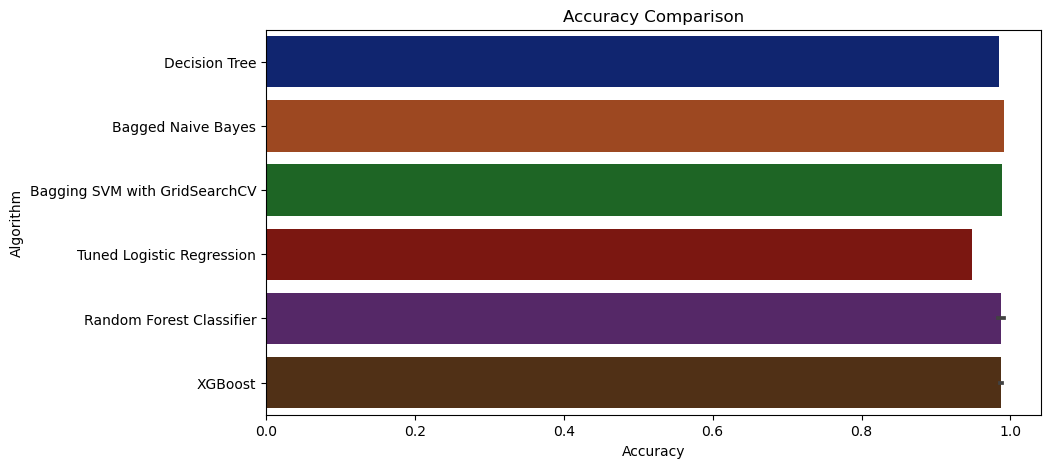

In [58]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [59]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9840909090909091
Bagged Naive Bayes --> 0.990909090909091
Bagging SVM with GridSearchCV --> 0.9886363636363636
Tuned Logistic Regression --> 0.9477272727272728
Random Forest Classifier --> 0.9931818181818182
XGBoost --> 0.9863636363636363


## Making a prediction

In [70]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
clf = RandomizedSearchCV(RF, param_distributions=param_dist, cv=5)

# Fit the RandomizedSearchCV object to the data
clf.fit(Xtrain, Ytrain)

# Get the best parameters and score
# best_score = clf.best_score_

# Predict on the test set
predicted_values = clf.predict(data)
# prediction = RF.predict(data)
print(predicted_values)

[5]


In [67]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
clf = RandomizedSearchCV(RF, param_distributions=param_dist, cv=5)

# Fit the RandomizedSearchCV object to the data
clf.fit(Xtrain, Ytrain)

# Get the best parameters and score
# best_score = clf.best_score_

# Predict on the test set
predicted_values = clf.predict(data)
# prediction = RF.predict(data)
print(predicted_values)

[8]
